In [14]:
from skimage import color, data, exposure
from skimage.transform import rescale

import matplotlib.pyplot as plt
import numpy as np

import os
import cv2
import glob

In [3]:
checkerboard = data.checkerboard()

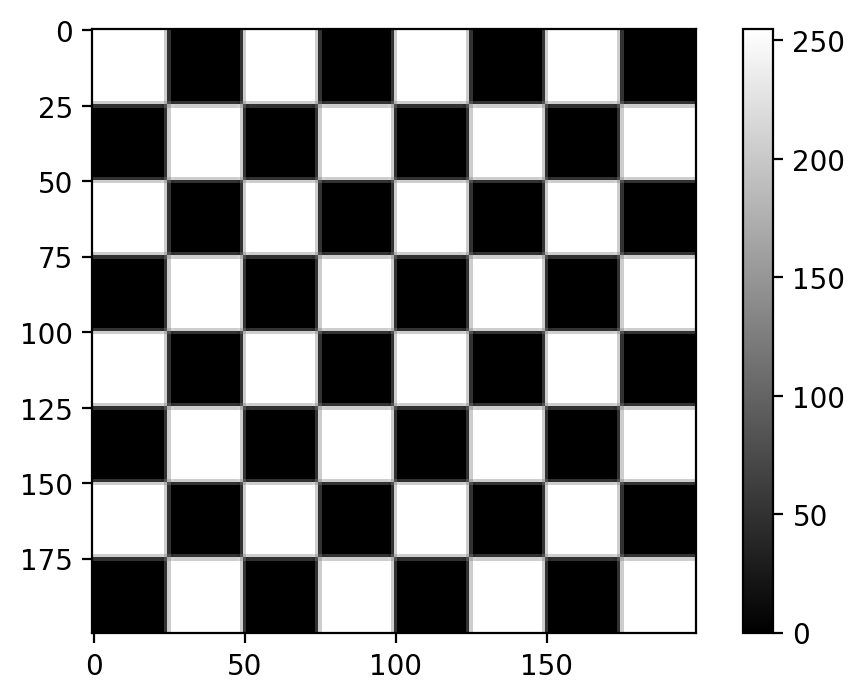

In [6]:
plt.figure(dpi = 200)
plt.imshow(checkerboard, cmap = 'gray')
plt.colorbar()

In [7]:

 
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
# images = glob.glob('*.jpg')
 

In [11]:
data_path = '/Users/reneprincipe/Library/CloudStorage/GoogleDrive-rlprincipe@up.edu.ph/My Drive/PhD Physics/4.2/Physics 305 - Optical Payload Characterization/Activity 04/'

checkerboard_files = [f for f in os.listdir(data_path) if not f.startswith('.')]
checkerboard_files.sort()
checkerboard_files

['01.bmp',
 '02.bmp',
 '03.bmp',
 '04.bmp',
 '05.bmp',
 '06.bmp',
 '07.bmp',
 '08.bmp',
 '09.bmp',
 '10.bmp',
 '11.bmp',
 '12.bmp',
 '13.bmp',
 '14.bmp',
 '15.bmp',
 '16.bmp',
 '17.bmp',
 '18.bmp',
 '19.bmp',
 '20.bmp']

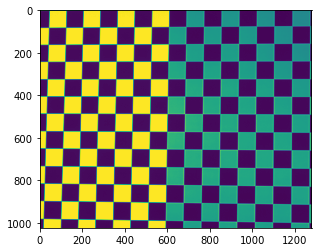

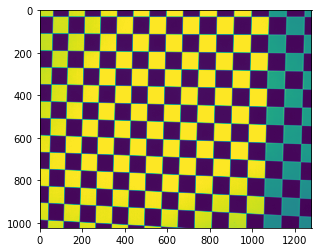

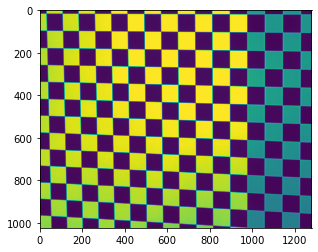

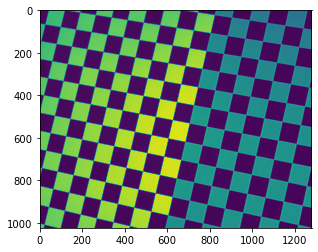

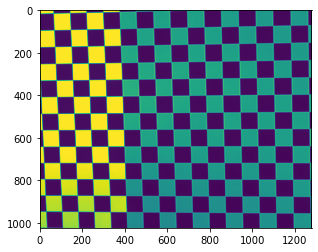

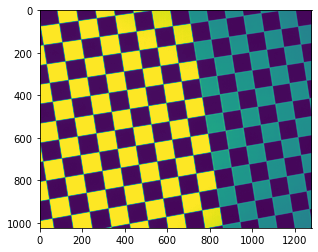

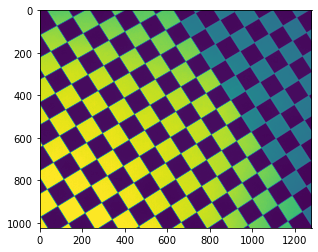

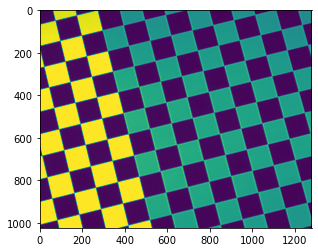

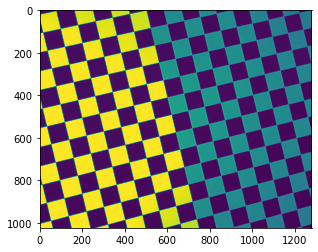

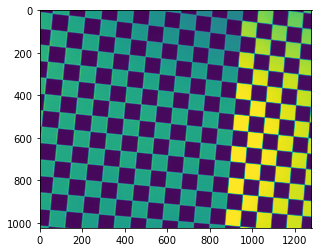

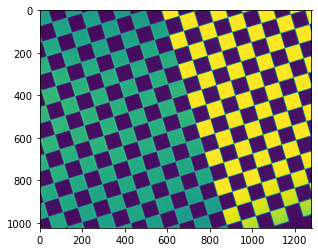

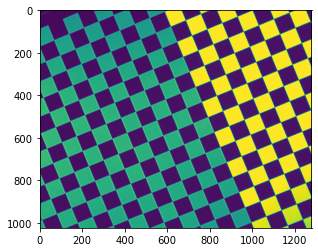

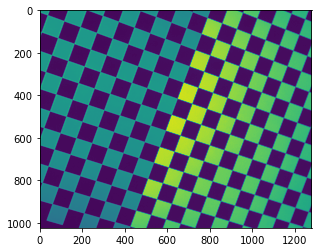

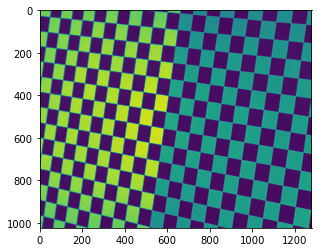

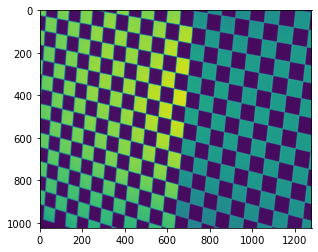

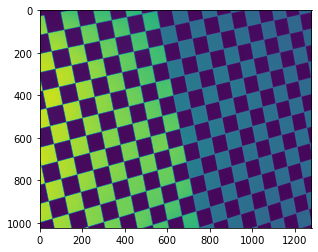

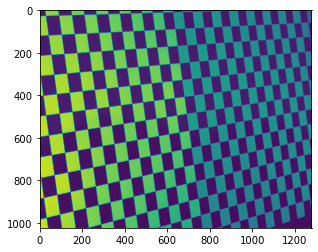

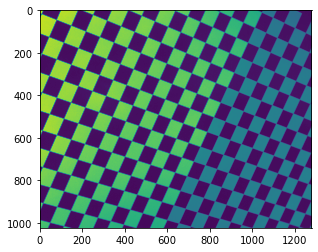

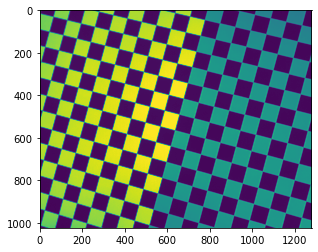

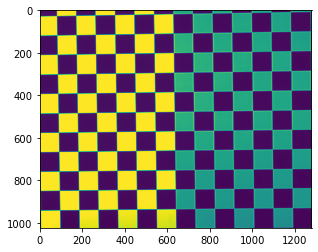

In [18]:
# Read the image
for img_file in checkerboard_files:

    img_path = data_path+img_file
    image = cv2.imread(img_path) 
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    
    
#     plt.imshow(grayColor)
#     plt.show()


In [ ]:
# Define the dimensions of checkerboard 
CHECKERBOARD = (6, 9) 
  
# stop the iteration when specified 
# accuracy, epsilon, is reached or 
# specified number of iterations are completed. 
criteria = (cv2.TERM_CRITERIA_EPS + 
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) 
  

# Vector for 3D points 
threedpoints = [] 
  
# Vector for 2D points 
twodpoints = [] 
  

#  3D points real world coordinates 
objectp3d = np.zeros((1, CHECKERBOARD[0]  
                      * CHECKERBOARD[1],  
                      3), np.float32) 
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0], 
                               0:CHECKERBOARD[1]].T.reshape(-1, 2) 
prev_img_shape = None
  
for img_file in checkerboard_files:

    img_path = data_path+img_file
    image = cv2.imread(img_path) 
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
    # Find the chess board corners 
    # If desired number of corners are 
    # found in the image then ret = true 
    ret, corners = cv2.findChessboardCorners( 
                    grayColor, CHECKERBOARD,  
                    cv2.CALIB_CB_ADAPTIVE_THRESH  
                    + cv2.CALIB_CB_FAST_CHECK + 
                    cv2.CALIB_CB_NORMALIZE_IMAGE) 
  
    # If desired number of corners can be detected then, 
    # refine the pixel coordinates and display 
    # them on the images of checker board 
    if ret == True: 
        threedpoints.append(objectp3d) 
  
        # Refining pixel coordinates 
        # for given 2d points. 
        corners2 = cv2.cornerSubPix( 
            grayColor, corners, (11, 11), (-1, -1), criteria) 
  
        twodpoints.append(corners2) 
  
        # Draw and display the corners 
        image = cv2.drawChessboardCorners(image,  
                                          CHECKERBOARD,  
                                          corners2, ret) 
  
    cv2.imshow('img', image) 
    cv2.waitKey(0) 

cv2.destroyAllWindows() 
  
h, w = image.shape[:2] 
  

# Perform camera calibration by 
# passing the value of above found out 3D points (threedpoints) 
# and its corresponding pixel coordinates of the 
# detected corners (twodpoints) 
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera( 
    threedpoints, twodpoints, grayColor.shape[::-1], None, None) 
  

# Displaying required output 
print(" Camera matrix:") 
print(matrix) 
  
print("\n Distortion coefficient:") 
print(distortion) 
  
print("\n Rotation Vectors:") 
print(r_vecs) 
  
print("\n Translation Vectors:") 
print(t_vecs) 

In [17]:
# Read the image
for img_file in checkerboard_files:

    img_path = data_path+img_file
    image = cv2.imread(img_path) 
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
#     ret, corners = cv2.findChessboardCorners( 
#                 grayColor, CHECKERBOARD,  
#                 cv2.CALIB_CB_ADAPTIVE_THRESH  
#                 + cv2.CALIB_CB_FAST_CHECK + 
#                 cv2.CALIB_CB_NORMALIZE_IMAGE) 

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(grayColor, (7,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

    corners2 = cv.cornerSubPix(grayColor,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners2)

    # Draw and display the corners
    cv.drawChessboardCorners(img, (7,6), corners2, ret)
    cv.imshow('img', img)
    cv.waitKey(500)

cv.destroyAllWindows()

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/cornersubpix.cpp:58: error: (-215:Assertion failed) count >= 0 in function 'cornerSubPix'


In [ ]:
  image = cv2.imread(filename) 
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
    # Find the chess board corners 
    # If desired number of corners are 
    # found in the image then ret = true 
    ret, corners = cv2.findChessboardCorners( 
                    grayColor, CHECKERBOARD,  
                    cv2.CALIB_CB_ADAPTIVE_THRESH  
                    + cv2.CALIB_CB_FAST_CHECK + 
                    cv2.CALIB_CB_NORMALIZE_IMAGE) 